# **Exploratory Analysis**


### **Motivation** 

This section serves to investigate the question: *What characterizes the companies who go bankrupt?*

By investigating this question, we can better select what information is relevant to include in our life-sentences. 

### **Outline** 

This section serves to investigate the question: *What characterizes the companies who go bankrupt?*

By investigating this question, we can better select what information is relevant to include in our life-sentences. 

Let's break down the research question into more digestable sub-questions.

**1. Counts**
- How many bankruptcies occur yearly in Denmark?

*Plot 1.a*: count of bankrupt companies from 2013 to 2023 (Barchart / timeseries)


**2. Industry**
- Are some industries more susceptible to bankruptcies?

*Plot 2.a*: Number of bankruptcies split on industries per year (stacked barchart) \
*Plot 2.b*: Share of bankruptcies within the industries


**3. Company Age**
- How old are companies typically when they go bankrupt? Does it vary per industry?

*Plot 3.a*: Distribution of company age for all bankrupt companies in our subset (histogram) \
*Plot 3.b*: Same - but split on industry (most frequent industries). (histogram, colored by the industry)


**4. Financials**
- Does financial figures from annual reports indicate bankruptcy?

plot ide: scatterplot of (avg, weighted?) key1 vs key2 colored by if the company has gone bankrupt
plot ide: Choose industry, plot a time series plot annual reports keys, color lines by bankruptcy


**5. Employees**
- Employee count is a proxy for company size. Can we say something about if larger/smaller companies fail more/less?



**6. Boards** 
- experience of boards do something?



**7. Investments**
- number and size of investments



**8. Capital Changes**
- Does raised capital decrease risk of bankcruptcy?




In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

DATA_ROOT = Path.home() / "Library" / "CloudStorage" / "OneDrive-DanmarksTekniskeUniversitet" / "Virk2Vec" / "data"

## **1. DEBUGGING**

In [5]:
path = '/Users/nikolaibeckjensen/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Virk2Vec/data/interim/sources/annual_report/parsed/part.1.parquet'
path2 = r'/Users/nikolaibeckjensen/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Virk2Vec/data/processed/sources/annual_report/tokenized/part.0.parquet'
df = pd.read_parquet(path2)

In [22]:
df.sample()

,FROM_DATE,COMPANY_TYPE,INDUSTRY,COMPANY_STATUS,MUNICIPALITY,PROFIT_LOSS,EQUITY,ASSETS,LIABILITIES_AND_EQUITY
CVR,,,,,,,,,
20853786,2023-05-04,CTYP_APS,IND_8121,CSTAT_ACTIVE,MUN_173,2555.0,195353.0,365473.0,365473.0


In [23]:
df.loc[df.index == 20853786]

,FROM_DATE,COMPANY_TYPE,INDUSTRY,COMPANY_STATUS,MUNICIPALITY,PROFIT_LOSS,EQUITY,ASSETS,LIABILITIES_AND_EQUITY
CVR,,,,,,,,,
20853786,2014-06-04,CTYP_APS,IND_8121,CSTAT_DISTRESS,MUN_173,50314.0,239457.0,293667.0,293667.0
20853786,2015-06-12,CTYP_APS,IND_8121,CSTAT_ACTIVE,MUN_173,29919.0,189143.0,356323.0,356323.0
20853786,2016-05-23,CTYP_APS,IND_8121,CSTAT_ACTIVE,MUN_173,23876.0,119936.0,154426.0,154426.0
20853786,2018-04-03,CTYP_APS,IND_8121,CSTAT_ACTIVE,MUN_173,-36129.0,159223.0,285775.0,285775.0
20853786,2019-05-27,CTYP_APS,IND_8121,CSTAT_ACTIVE,MUN_173,12996.0,96059.0,111131.0,111131.0
20853786,2019-05-29,CTYP_APS,IND_8121,CSTAT_ACTIVE,MUN_173,-60394.0,61366.0,175364.0,175364.0
20853786,2020-08-12,CTYP_APS,IND_8121,CSTAT_ACTIVE,MUN_173,46146.0,285604.0,319656.0,319656.0
20853786,2022-06-10,CTYP_APS,IND_8121,CSTAT_ACTIVE,MUN_173,56832.0,192798.0,346728.0,346728.0
20853786,2022-06-13,CTYP_APS,IND_8121,CSTAT_ACTIVE,MUN_173,21697.0,83063.0,101363.0,101363.0


In [30]:
folder = '/Users/nikolaibeckjensen/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Virk2Vec/data/Tables/Financials'
files = [file for file in os.listdir(folder) if file.endswith('.csv')]
for file in files:
    data = pd.read_csv(os.path.join(folder, file), index_col=0)

    if len(data.loc[data.CVR == 20853786]) > 0:
        print(file)
        break

chunk155.csv


In [31]:
data.loc[data.CVR == 20853786][['CVR', 'PublicationDate', 'ProfitLoss', 'Assets', 'Equity', 'LiabilitiesAndEquity']]

,CVR,PublicationDate,ProfitLoss,Assets,Equity,LiabilitiesAndEquity
7138,20853786,2020-02-27,-36129.0,285775,159223.0,285775.0


## **1. Counts**

In [ ]:
# read all registration data
registration_folder = DATA_ROOT / "Tables" / "Registrations"
registration_files = [file for file in os.listdir(registration_folder) if file.endswith('.csv')]
registrations = pd.concat([pd.read_csv(os.path.join(registration_folder, file), index_col=0) for file in registration_files])
registrations = registrations.loc[registrations.ChangeType == 'Status']

In [118]:
bankrupt_types = ['OPLØST EFTER KONKURS', 'TVANGSOPLØST']
distress_types = ['UNDER TVANGSOPLØSNING', 'UNDER REKONSTRUKTION', 'UNDER KONKURS']
df_bankrupt = registrations.loc[registrations.NewValue.isin(bankrupt_types)]
df_distress = registrations.loc[registrations.NewValue.isin(distress_types)]

In [168]:
cvr = df_distress.sample().CVR.item()
registrations.loc[registrations.CVR == cvr]

,CVR,FromDate,ChangeType,NewValue
91449,21450839,1999-02-01,Status,NORMAL
91450,21450839,2023-02-07,Status,UNDER TVANGSOPLØSNING
91451,21450839,2023-07-07,Status,UNDER KONKURS


In [208]:
#groupby make newvalue a list
df_list = registrations.groupby('CVR').NewValue.apply(list)
status_changes = df_list.tolist()
status_changes = [status_change + ["-->NO FURTHER CHANGEs<--"] for status_change in status_changes]

In [209]:
#status_types = ["NORMAL"] + bankrupt_types + distress_types
status_types = registrations.NewValue.value_counts(normalize=True).index[:13].tolist() + ["-->NO FURTHER CHANGEs<--"]


all_combinations = []
for status in status_types:
    for status2 in status_types:
        all_combinations.append((status, status2))

def transition_count(status_changes, key1, key2):
    transition_count = sum(
        1 for status_list in status_changes
        for i in range(len(status_list) - 1)
        if status_list[i] == key1 and status_list[i + 1] == key2
    )
    return transition_count

# create a matrix of status changes
status_matrix = np.zeros((len(status_types), len(status_types)))
for i, status1 in enumerate(status_types):
    for j, status2 in enumerate(status_types):
        status_matrix[i, j] = transition_count(status_changes, status1, status2)

# compute the transition probabilities
transition_probabilities = status_matrix / status_matrix.sum(axis=1, keepdims=True)


/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_6088/2473602964.py:25: RuntimeWarning: invalid value encountered in divide
  transition_probabilities = status_matrix / status_matrix.sum(axis=1, keepdims=True)


Text(0.5, 1.0, 'Status transition matrix')

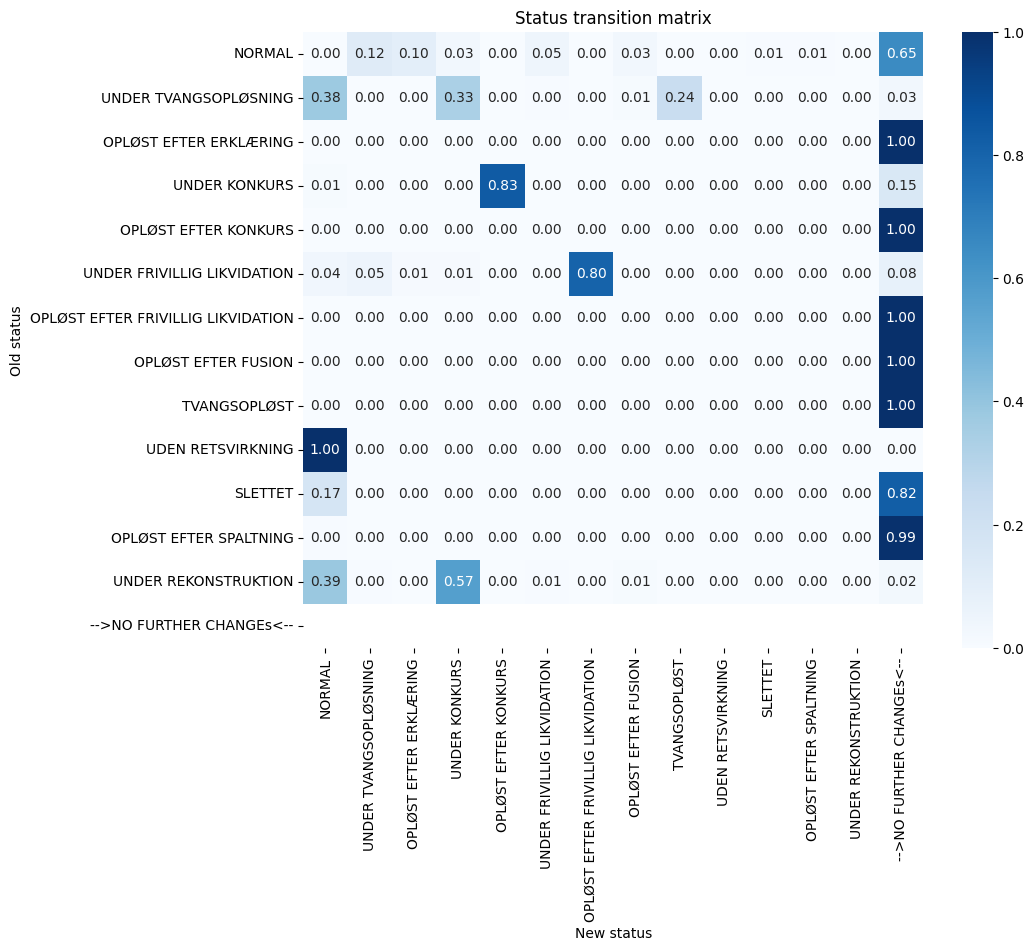

In [210]:
# plot the matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(transition_probabilities, annot=True, xticklabels=status_types, yticklabels=status_types, fmt=".2f", cmap="Blues")
plt.xlabel('New status')
plt.ylabel('Old status')
plt.title('Status transition matrix')

In [ ]:





transition_count_UT_T = sum(
    1 for status_list in status_changes
    for i in range(len(status_list) - 1)
    if status_list[i] == 'UNDER TVANGSOPLØSNING' and status_list[i + 1] == 'TVANGSOPLØST'
)

transition_count_UT_N = sum(
    1 for status_list in status_changes
    for i in range(len(status_list) - 1)
    if status_list[i] == 'UNDER TVANGSOPLØSNING' and status_list[i + 1] == 'NORMAL'
)

print(f"Number of transitions from 'UNDER TVANGSOPLØSNING' to 'TVANGSOPLØST': {transition_count_UT_T}")
print(f"Number of transitions from 'UNDER TVANGSOPLØSNING' to 'NORMAL': {transition_count_UT_N}")

Number of transitions from 'UNDER TVANGSOPLØSNING' to 'TVANGSOPLØST': 13133
Number of transitions from 'UNDER TVANGSOPLØSNING' to 'NORMAL': 21050


In [179]:
a = [
    ['NORMAL', 'UNDER TVANGSOPLØSNING', 'UNDER KONKURS', 'OPLØST EFTER KONKURS', 'UNDER TVANGSOPLØSNING', 'UNDER KONKURS', 'OPLØST EFTER KONKURS'],
    ['NORMAL'],
    ['NORMAL', 'UNDER TVANGSOPLØSNING', 'UNDER KONKURS', 'OPLØST EFTER KONKURS']
    ]

b = (   1 for status_list in a
    for i in range(len(status_list) - 1)
    if status_list[i] == 'UNDER KONKURS' and status_list[i + 1] == 'OPLØST EFTER KONKURS'
)


In [213]:
import torch

In [215]:
x = torch.tensor(np.ones((10,3)))


torch.full_like(x[:, 2], 5)

tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], dtype=torch.float64)

## **2. Industry**

In [ ]:
# filter only to status changes of type ...


# read all company_info data


# join industry, founding date onto registration

## **3. Company Age**

## **4. Financials**

### Buffer

- livsforløb for konkursramte virk kontra “raske”
- antal medarbejder vs. finans tal
- bestyrelsesstørrelser, erfaringsudvikling
- viz for subset af grupper, store vs små virk fx



additional thoughts:

Some industries covary. Logistics have more bankruptcies if the whole production sector is down?

Years where the whole industry is down leads to more bankruptcies in the industry -duh?